In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the dataset
file_path = 'drug200.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])

# Features and target variable
X = data.drop('Drug', axis=1)
y = data['Drug']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
mlp_model = MLPClassifier(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
mlp_preds = mlp_model.predict(X_test)

# Evaluate the models
def evaluate_model(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    return accuracy, precision, recall

# Random Forest Evaluation
rf_accuracy, rf_precision, rf_recall = evaluate_model(rf_preds, y_test)

# Support Vector Machine Evaluation
svm_accuracy, svm_precision, svm_recall = evaluate_model(svm_preds, y_test)

# Multilayer Perceptron Evaluation
mlp_accuracy, mlp_precision, mlp_recall = evaluate_model(mlp_preds, y_test)

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Random Forest', 'Support Vector Machine', 'Multilayer Perceptron'],
    'Accuracy': [rf_accuracy, svm_accuracy, mlp_accuracy],
    'Precision': [rf_precision, svm_precision, mlp_precision],
    'Recall': [rf_recall, svm_recall, mlp_recall]
})

# Display the results
results


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Precision,Recall
0,Random Forest,1.000,1.000000,1.000
1,Support Vector Machine,0.975,0.976562,0.975
2,Multilayer Perceptron,0.925,0.934255,0.925


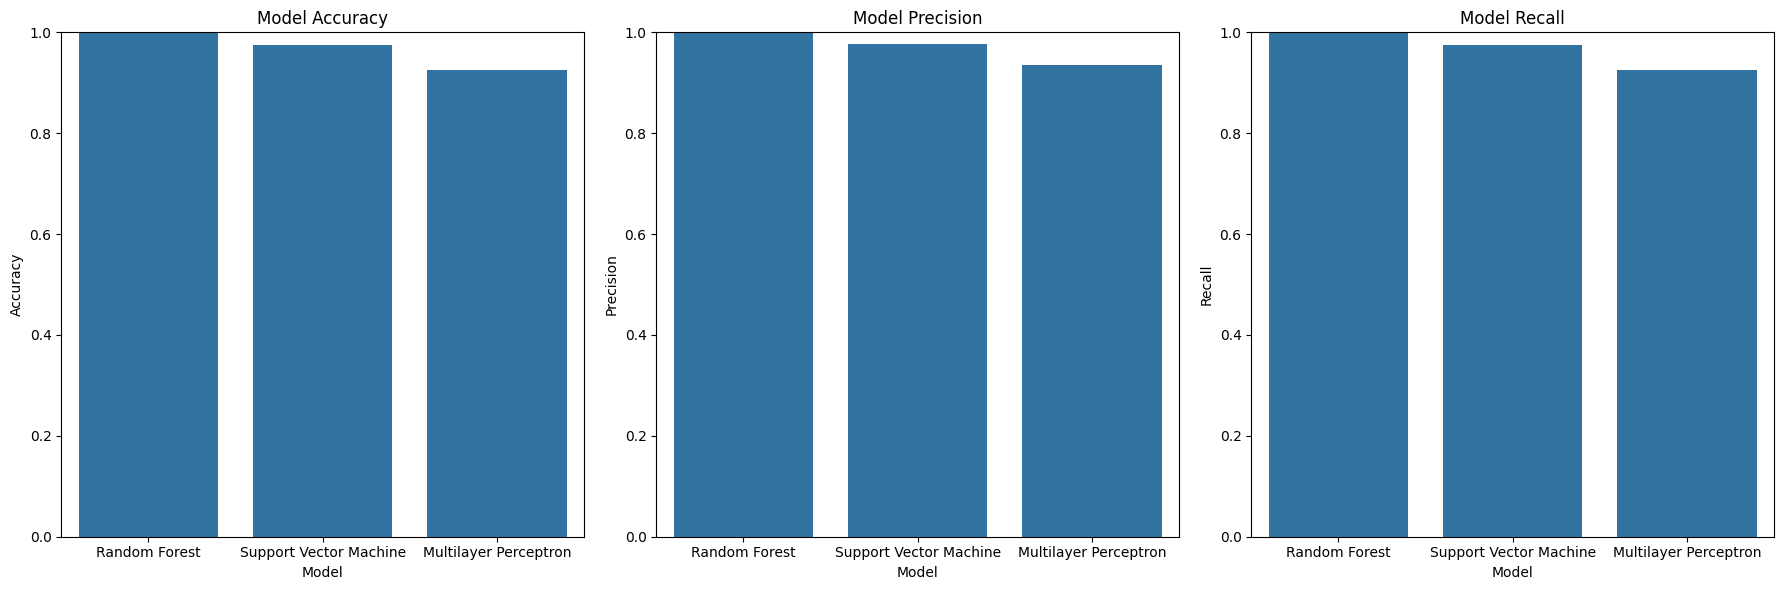

In [5]:
# Plotting the accuracy, precision, and recall of the models
plt.figure(figsize=(18, 6))

# Accuracy
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Precision
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='Precision', data=results)
plt.title('Model Precision')
plt.ylim(0, 1)

# Recall
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='Recall', data=results)
plt.title('Model Recall')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
